In [1]:
!pip install deep-translator
!pip install geojson

In [2]:
import pandas as pd
import geojson
import numpy as np
from deep_translator import GoogleTranslator

import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_df = pd.read_csv('Resources/sale_clean.csv')
sales_df.head()

,regione,citta,quartiere,prezzo,datetime,posti auto,bagni per stanza,bagni,stanze,ultimo piano,...,giardino privato,impianto allarme,portiere,piscina,villa,intera proprieta,appartamento,attico,loft,mansarda
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,1,1,0,0,1,0,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,1,0,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,1,0,0,0,1,0,0,0,0,0


In [4]:
## translate columns in english
def Translate(italian_input):
    return GoogleTranslator(source='it', target='en').translate(italian_input)

columns_translated = [Translate(c) for c in sales_df.columns]
columns_translated[-1] = "attic2"

columns_translated = [c.replace(" ", "_") for c in columns_translated]
sales_df.columns = columns_translated
sales_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,rooms,top_floor,...,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts,attic2
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,1,1,0,0,1,0,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,1,0,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,1,0,0,0,1,0,0,0,0,0


In [5]:
sales_df.dtypes

region                  object
city                    object
quarter                 object
price                  float64
datetime                object
parking_spaces           int64
bathrooms_per_room     float64
bathrooms              float64
rooms                  float64
top_floor                int64
state                   object
energy_rating           object
sea_​​View             float64
centralized_warming    float64
surface                float64
furnished                int64
balcony                  int64
TV_system                int64
external_exposure        int64
optic_fiber              int64
electric_gate            int64
cellar                   int64
common_garden            int64
private_garden           int64
alarm_system             int64
doorman                  int64
pool                     int64
villa                    int64
entire_property          int64
apartment                int64
attic                    int64
lofts                    int64
attic2  

In [6]:
sales_df['datetime'] = pd.to_datetime(sales_df['datetime'])

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   region               37087 non-null  object        
 1   city                 37087 non-null  object        
 2   quarter              35154 non-null  object        
 3   price                35534 non-null  float64       
 4   datetime             37087 non-null  datetime64[ns]
 5   parking_spaces       37087 non-null  int64         
 6   bathrooms_per_room   29155 non-null  float64       
 7   bathrooms            36480 non-null  float64       
 8   rooms                29399 non-null  float64       
 9   top_floor            37087 non-null  int64         
 10  state                8013 non-null   object        
 11  energy_rating        6131 non-null   object        
 12  sea_​​View           37082 non-null  float64       
 13  centralized_warming  6336 non-n

In [8]:
sales_df = sales_df.rename(columns = {'sea_​​View': 'sea_view', 'rooms':'bedrooms'})
sales_df.columns

Index(['region', 'city', 'quarter', 'price', 'datetime', 'parking_spaces',
       'bathrooms_per_room', 'bathrooms', 'bedrooms', 'top_floor', 'state',
       'energy_rating', 'sea_view', 'centralized_warming', 'surface',
       'furnished', 'balcony', 'TV_system', 'external_exposure', 'optic_fiber',
       'electric_gate', 'cellar', 'common_garden', 'private_garden',
       'alarm_system', 'doorman', 'pool', 'villa', 'entire_property',
       'apartment', 'attic', 'lofts', 'attic2'],
      dtype='object')

In [9]:
sales_df = sales_df.drop(columns=['attic2'])
sales_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
sales_df.nunique()

region                   21
city                   2324
quarter                8021
price                  2787
datetime                587
parking_spaces            2
bathrooms_per_room       28
bathrooms                 9
bedrooms                  5
top_floor                 2
state                     4
energy_rating             8
sea_view                  2
centralized_warming       2
surface                 292
furnished                 2
balcony                   2
TV_system                 2
external_exposure         2
optic_fiber               2
electric_gate             2
cellar                    2
common_garden             2
private_garden            2
alarm_system              1
doorman                   2
pool                      2
villa                     2
entire_property           1
apartment                 2
attic                     2
lofts                     2
dtype: int64

In [11]:
sales_df[['bedrooms', 'bathrooms', 'price']].isnull().sum()

bedrooms     7688
bathrooms     607
price        1553
dtype: int64

In [12]:
sales_df.dropna(subset=['price', 'bedrooms', 'bathrooms'], inplace=True)
sales_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [13]:
filter_values = (sales_df['price'] >= 1000) & (sales_df['price'] <= 10000000)

# Apply the mask to filter the DataFrame
filtered_df = sales_df[filter_values]
filtered_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [14]:
filtered_df.isnull().sum()

region                     0
city                       0
quarter                  950
price                      0
datetime                   0
parking_spaces             0
bathrooms_per_room         0
bathrooms                  0
bedrooms                   0
top_floor                  0
state                  19925
energy_rating          20471
sea_view                   0
centralized_warming    20741
surface                 2728
furnished                  0
balcony                    0
TV_system                  0
external_exposure          0
optic_fiber                0
electric_gate              0
cellar                     0
common_garden              0
private_garden             0
alarm_system               0
doorman                    0
pool                       0
villa                      0
entire_property            0
apartment                  0
attic                      0
lofts                      0
dtype: int64

In [15]:
surface_average = round(filtered_df['surface'].mean() , 0)
filtered_df['surface'].fillna(surface_average, inplace=True)
filtered_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [16]:
filtered_df.reset_index(drop=True, inplace=True)
duplicates = filtered_df[filtered_df.duplicated()]
duplicates.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
206,lombardia,Milano,Isola,1100.0,2023-05-18,0,0.500000,1.0,2.0,0,...,0,0,0,0,0,0,0,1,0,0
230,lombardia,Milano,Dergano,1250.0,2023-05-18,0,0.666667,2.0,3.0,0,...,0,0,0,0,0,0,0,1,0,0
262,lombardia,Melzo,Via Giuseppe Costa,1000.0,2023-05-18,1,0.250000,1.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
269,lombardia,Milano,Centrale,2700.0,2023-05-18,0,0.250000,1.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
294,lombardia,Milano,Garibaldi - Corso Como,1500.0,2023-05-18,0,0.500000,1.0,2.0,0,...,0,0,0,0,0,0,0,1,0,0


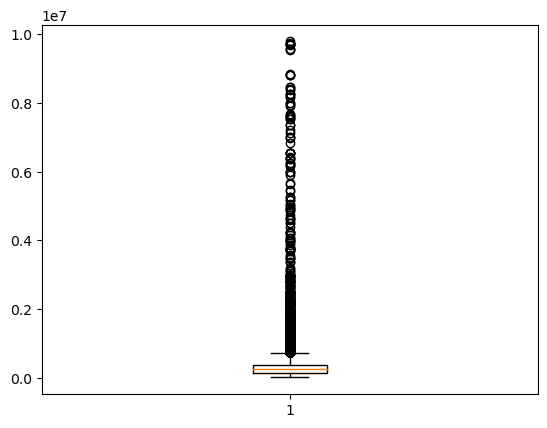

In [17]:
import matplotlib.pyplot as plt

price = filtered_df['price']
plt.boxplot(price)
plt.show()

In [18]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of housing is: {lowerq}")
print(f"The upper quartile of housing is: {upperq}")
print(f"The interquartile range of housing is: {iqr}")
print(f"The median of housing is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of housing is: 132000.0
The upper quartile of housing is: 370000.0
The interquartile range of housing is: 238000.0
The median of housing is: 235000.0 
Values below -225000.0 could be outliers.
Values above 727000.0 could be outliers.


In [19]:
filtered_df.to_csv('Output/sales.csv', index=False)

In [20]:
count = filtered_df['region'].value_counts()
count

lombardia                3769
emilia-romagna           3114
piemonte                 2972
toscana                  2799
veneto                   2631
lazio                    1990
campania                 1595
sicilia                  1428
calabria                  691
sardegna                  234
trentino-alto-adige       129
valle-d-aosta             124
friuli-venezia-giulia     121
basilicata                119
liguria                   110
emilia-Romagna            102
marche                     96
molise                     94
puglia                     90
abruzzo                    55
umbria                     28
Name: region, dtype: int64

In [21]:
count[count>100]

lombardia                3769
emilia-romagna           3114
piemonte                 2972
toscana                  2799
veneto                   2631
lazio                    1990
campania                 1595
sicilia                  1428
calabria                  691
sardegna                  234
trentino-alto-adige       129
valle-d-aosta             124
friuli-venezia-giulia     121
basilicata                119
liguria                   110
emilia-Romagna            102
Name: region, dtype: int64

In [22]:
# file_path = 'Resources/limits_IT_municipalities.geojson'

# # Open and read the GeoJSON file
# with open(file_path, 'r') as f:
#     data = geojson.load(f)

# # Now you can work with the GeoJSON data
# print(data)